In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2)

$$
f(x) \;=\; \frac{1}{\sigma \sqrt{2\pi}}
\exp\!\Bigl(-\tfrac{(x - \mu)^2}{2\sigma^2}\Bigr)
$$

[Explicacion del chat de formula curtosis](https://chatgpt.com/c/68598d5f-12e8-8006-a21f-ec8c1f6efaee?model=o4-mini-high)

In [3]:
def normal_pdf(x, mu, sigma):
    fraction = 1/(sigma*np.sqrt(2*np.pi))
    exp_term = -.5 * ((x-mu)/sigma)**2
    return fraction * np.exp(exp_term)

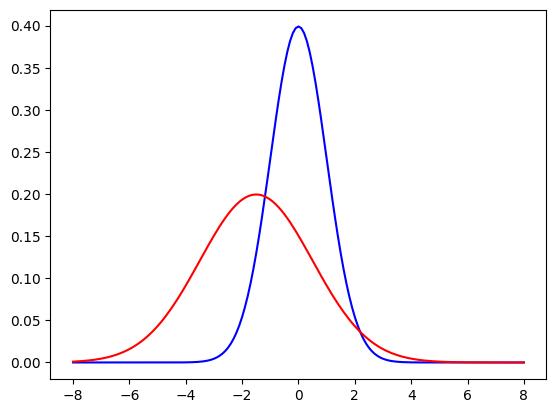

In [4]:
s = pd.Series(np.arange(-8,8.1,0.1))
s_norm_1 = normal_pdf(s, mu=0, sigma=np.sqrt(1))
s_norm_2 = normal_pdf(s, mu=-1.5, sigma=np.sqrt(4))
plt.plot(s, s_norm_1, label='N(0,1)', color='blue')
plt.plot(s, s_norm_2, label='N(-1.5,4)', color='red')

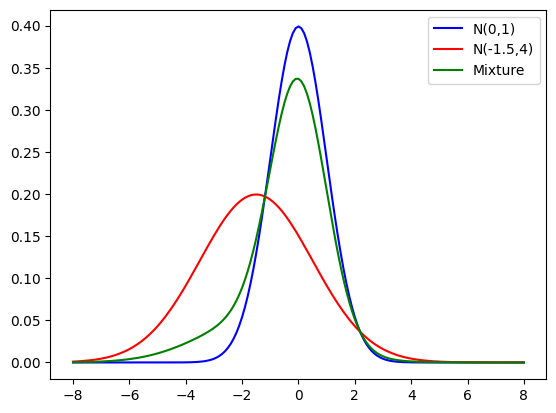

In [27]:
# Mixtura: 0.75 * N(0,1) + 0.25 * N(-1.5,4)
mixtured = 0.75 * normal_pdf(s, mu=0, sigma=np.sqrt(1)) + 0.25 * normal_pdf(s, mu=-1.5, sigma=np.sqrt(4))
plt.plot(s, s_norm_1, label='N(0,1)', color='blue')
plt.plot(s, s_norm_2, label='N(-1.5,4)', color='red')
plt.plot(s, mixtured, label='Mixture', color='green')
plt.legend()

# Muestral

In [6]:
X = pd.Series(np.random.normal(0, 1, 1000))

In [7]:
# Asimetría
std = X.std()
mean = X.mean()
np.mean(((X - mean)/std)**3)

np.float64(-0.04649020535372844)

In [8]:
# Curtosis
std = X.std()
mean = X.mean()
np.mean(((X - mean)/std)**4)

np.float64(2.932516283818366)

In [9]:
### Insesgados

def sample_skewness(x):
    n = len(x)
    mean = x.mean()
    s = x.std(ddof=1)
    return (n/((n-1)*(n-2))) * np.sum(((x-mean)/s)**3)

def sample_excess_kurtosis(x):
    n = len(x)
    mean = x.mean()
    s = x.std(ddof=1)
    term4 = np.sum(((x-mean)/s)**4)
    return (n*(n+1)/((n-1)*(n-2)*(n-3))) * term4 - 3*(n-1)**2/((n-2)*(n-3))

# Ejemplo de uso
sample_skewness(X), sample_excess_kurtosis(X)

(np.float64(-0.04663000210002432), np.float64(-0.055894952101319895))

# Poblacional: N(μ,σ²)

## Una sola normal

In [10]:
# Asimetría a mano (vale incluso si media no es cero)
# Para cualquier normal, el tercer momento central es 0
varianza = 4
tercer_momento_central = 0              # = E[(X−μ)^3] = 0 para cualquier N(μ,σ²)
asimetria = tercer_momento_central / (varianza**1.5)
print(f'Asimetría (skewness): {asimetria}')

Asimetría (skewness): 0.0


## Mixtura normales

### Esperanza
$$
\mathbb{E}[X] \;=\; \sum_{i=1}^{k} \pi_{i}\,\mu_{i}
$$

- De hecho, **cualquier momento no centrado es una combinación lineal de ambos, si ambos tienen media=0.**

- El segundo momento no centrado de una normal es E[x^2] = 𝜇^2 + 𝜎^2. El de la mixtura es una combinación lineal de las de ambas distribuciones.

### Segundo momento (centrado y no centrado)
$$
\mathrm{Var}(X)
\;=\;
\sum_{i=1}^{k} \pi_{i}\bigl(\sigma_{i}^{2} + \mu_{i}^{2}\bigr)
\;-\;
\Bigl(\sum_{i=1}^{k} \pi_{i}\,\mu_{i}\Bigr)^{2}
$$

### Caso especial ($\mu_{i}=0$)
$$
\mathbb{E}[X] = 0
$$
$$
\mathrm{Var}(X)
\;=\;
\sum_{i=1}^{k} \pi_{i}\,\sigma_{i}^{2}
$$

----
### Solo si mu1 = mu2:
### Curtosis
$$
\frac{E\bigl[(X-\mu)^4\bigr]}{\bigl(\sigma^2\bigr)^2}
= \frac{w_1\,E\bigl[(X_1-\mu)^4\bigr]\;+\;w_2\,E\bigl[(X_2-\mu)^4\bigr]}{\bigl(w_1\sigma_1^2 + w_2\sigma_2^2\bigr)^2}
= \frac{3\,\bigl(w_1\,\sigma_1^4 + w_2\,\sigma_2^4\bigr)}{\bigl(w_1\sigma_1^2 + w_2\sigma_2^2\bigr)^2}.
$$

### Asimetría
$$
\frac{E\bigl[(X-\mu)^3\bigr]}{\sigma^3}
= \frac{w_1\,E\bigl[(X_1-\mu)^3\bigr]\;+\;w_2\,E\bigl[(X_2-\mu)^3\bigr]}{\bigl(w_1\sigma_1^2 + w_2\sigma_2^2\bigr)^{3/2}}.
$$



In [11]:
# Curtosis a mano (vale incluso si media no es cero)
# Para cualquier normal, el cuarto momento central es 3·σ⁴
varianza = 4                                        # σ²
cuarto_momento_central = 3 * (varianza**2)          # μ₄ = 3·σ⁴
kurtosis = cuarto_momento_central / (varianza**2)   # μ₄/σ⁴ = 3, para cualquier normal
exceso = kurtosis - 3                               
print(f'Exceso de curtosis: {exceso}')

Exceso de curtosis: 0.0


In [30]:
# Define the mixture parameters
p = np.array([0.75, 0.25])  # Mixture weights
mu_i = np.array([0.0, -1.5])  # Means of the components
sigma_i = np.array([1.0, 2.0])  # Standard deviations of the components

# Mean of the mixture
mu = np.dot(p, mu_i)

# Variance of the mixture
var = np.dot(p, sigma_i**2 + mu_i**2) - mu**2

# Third central moment for skewness
m3 = np.dot(p, (mu_i - mu)**3 + 3*(mu_i - mu)*sigma_i**2)

# Skewness
skewness = m3 / var**1.5

# Fourth central moment for kurtosis
m4 = np.dot(p, 3*sigma_i**4 + 6*(mu_i - mu)**2 * sigma_i**2 + (mu_i - mu)**4)

# Kurtosis
kurtosis = m4 / var**2
excess_kurtosis = kurtosis - 3

print(f"Mixture mean: {mu:.4f}")
print(f"Mixture variance: {var:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Excess kurtosis: {excess_kurtosis:.4f}")

Mixture mean: -0.3750
Mixture variance: 2.1719
Skewness: -0.8897
Kurtosis: 4.8530
Excess kurtosis: 1.8530


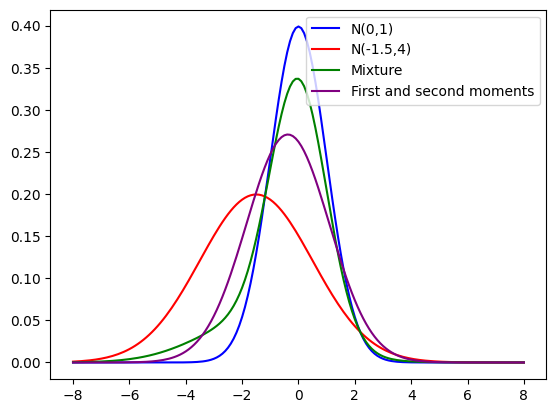

In [13]:
# Mixtura: 0.75 * N(0,1) + 0.25 * N(-1.5,4)
mixtured = 0.75 * normal_pdf(s, mu=0, sigma=np.sqrt(1)) + 0.25 * normal_pdf(s, mu=-1.5, sigma=np.sqrt(4))
first_second_moments = normal_pdf(s, mu=mu, sigma=np.sqrt(var))
plt.plot(s, s_norm_1, label='N(0,1)', color='blue')
plt.plot(s, s_norm_2, label='N(-1.5,4)', color='red')
plt.plot(s, mixtured, label='Mixture', color='green')
plt.plot(s, first_second_moments, label='First and second moments', color='purple') # Esta es la que permite comparar las colas con las de las normales originales
plt.legend()

In [14]:
### CALCULO DE LA CURTOSIS EN EXCESO DE LA MEZCLA

# Parámetros de la mezcla con medias distintas
p1, mu1, sigma1_sq = 0.75, 0.0, 1.0
p2, mu2, sigma2_sq = 0.25, -1.5, 4.0

# 1. Media de la mezcla
m_mix = p1*mu1 + p2*mu2

# 2. Varianza de la mezcla
var_mix = (
    p1*(sigma1_sq + (mu1 - m_mix)**2) +
    p2*(sigma2_sq + (mu2 - m_mix)**2)
)

# 3. Cuarto momento central de cada componente
mu4_1 = 3*sigma1_sq**2 + 6*sigma1_sq*(mu1 - m_mix)**2 + (mu1 - m_mix)**4
mu4_2 = 3*sigma2_sq**2 + 6*sigma2_sq*(mu2 - m_mix)**2 + (mu2 - m_mix)**4

# 4. Cuarto momento central de la mezcla
mu4_mix = p1*mu4_1 + p2*mu4_2

# 5. Curtosis en exceso
curtosis_exceso = mu4_mix/var_mix**2 - 3

print(f'Curtosis en exceso: {curtosis_exceso:.2f}')

Curtosis en exceso: 1.85


In [15]:
### CALCULO DE LA ASIMETRÍA (SKEWNESS) DE LA MEZCLA
# Parámetros de la mezcla
p1, mu1, sigma1_sq = 0.75, 0.0, 1.0
p2, mu2, sigma2_sq = 0.25, -1.5, 4.0

# Media de la mezcla
m_mix = p1 * mu1 + p2 * mu2

# Varianza de la mezcla
var_mix = (
    p1 * (sigma1_sq + (mu1 - m_mix)**2) +
    p2 * (sigma2_sq + (mu2 - m_mix)**2)
)

# Tercer momento central de la mezcla
mu3_comp1 = 3 * sigma1_sq * (mu1 - m_mix) + (mu1 - m_mix)**3
mu3_comp2 = 3 * sigma2_sq * (mu2 - m_mix) + (mu2 - m_mix)**3
mu3_mix = p1 * mu3_comp1 + p2 * mu3_comp2

# Asimetría (skewness)
asimetria = mu3_mix / var_mix**1.5

print(f'Asimetría (skewness): {asimetria:.2f}')

Asimetría (skewness): -0.89


# 3)

In [16]:
# 1. Instalación (si no la tienes)
# pip install yfinance

import yfinance as yf
import datetime

# 2. Definir ticker y rango (últimos 5 años hasta hoy)
ticker = "AAPL"
hoy   = datetime.date.today()
inicio= hoy - datetime.timedelta(days=5*365)

# 3. Descargar datos
df = yf.download(ticker,
                 start=inicio.strftime("%Y-%m-%d"),
                 end= hoy.strftime("%Y-%m-%d"),
                 progress=False)

# 4. Seleccionar sólo precios de cierre
serie_cierre = df["Close"]
serie_cierre = serie_cierre['AAPL'].reset_index()#.set_index('Date', drop=True)

/var/folders/_r/157z0l_91ps9f7pvx9d8nf0c0000gn/T/ipykernel_16698/2478541638.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker,


<Axes: title={'center': 'Serie de precios de cierre de AAPL'}, xlabel='Date'>

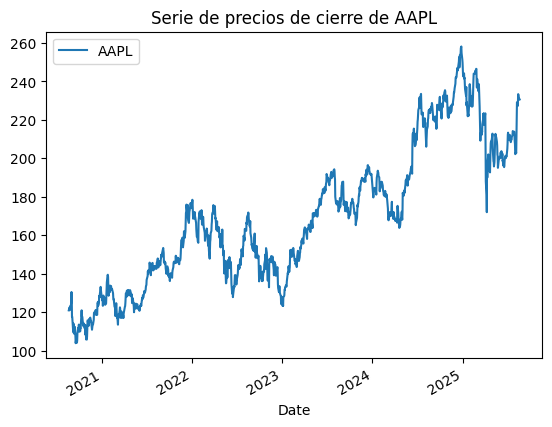

In [17]:
serie_cierre.plot(x='Date', y='AAPL', title='Serie de precios de cierre de AAPL')

Retornos diarios simples (RDS)

In [ ]:
serie_cierre['RDS'] = serie_cierre['AAPL'] / serie_cierre['AAPL'].shift(1) - 1

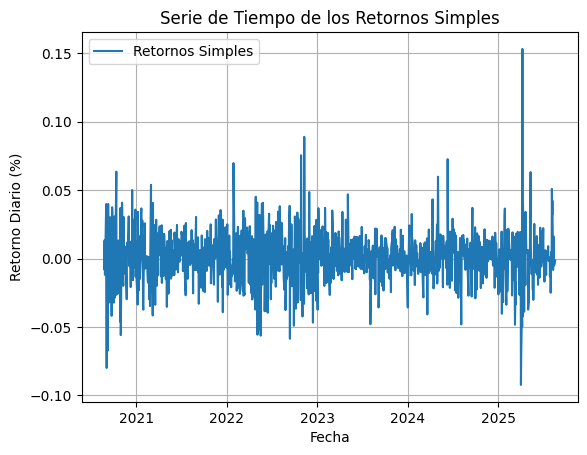

In [42]:
plt.figure()
plt.plot(serie_cierre['Date'], serie_cierre['RDS'], label='Retornos Simples')
plt.title('Serie de Tiempo de los Retornos Simples')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario (%)')
plt.grid(True)
plt.legend()
plt.show()

In [36]:
# Media
print(serie_cierre.RDS.mean())

# Volatilidad (desviación estándar)
print(serie_cierre.RDS.std())

0.0006847250684205769
0.01847100767837211


In [37]:
# Asimetría
print(serie_cierre.RDS.skew())

# Asimetría (lo mismo pero a mano)
X = serie_cierre.RDS
std = X.std()
mean = X.mean()
np.mean(((X - mean)/std)**3)

0.3161936875869353


np.float64(0.3154370424439683)

In [38]:
# Curtosis
print(serie_cierre.RDS.kurtosis()) # Insesgado

# Curtosis (lo mismo pero a mano)
X = serie_cierre.RDS
std = X.std()
mean = X.mean()
np.mean(((X - mean)/std)**4) - 3

5.62466846439928


np.float64(5.583746501622755)

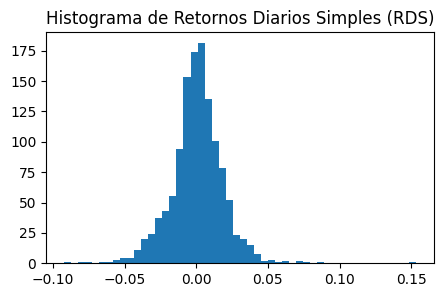

In [39]:
plt.figure(figsize=(10*.5, 6*.5))
plt.hist(serie_cierre.RDS, bins=50)
plt.title('Histograma de Retornos Diarios Simples (RDS)')
plt.show()

In [40]:
# Jarque Bera
from scipy.stats import jarque_bera
jb_stat, jb_p_value = jarque_bera(serie_cierre.RDS.dropna())
print(f"Jarque-Bera Statistic: {jb_stat:.4f}, p-value: {jb_p_value:.4f}")
if jb_p_value < 0.05:
    print("La serie no sigue una distribución normal (rechazamos H0)")
else:
    print("La serie sigue una distribución normal (no rechazamos H0)")

Jarque-Bera Statistic: 1656.5997, p-value: 0.0000
La serie no sigue una distribución normal (rechazamos H0)


Calcule los retornos logarítmicos diarios y para un mes cualquiera, verifique que la suma de los retornos logarítmicos diarios es igual al retorno logarítmico correspondiente a ese mes

In [43]:
# Retorno logarítmico mensual usando la serie de precios de cierre
X = serie_cierre.query('Date < "2020-10-01"').RDS.dropna()
retorno_log_diario = np.log(1 + X)
print(f'Retorno logarítmico mensual usando la serie de precios de cierre: {np.exp(sum(retorno_log_diario)) - 1:.4f}')

# Retorno logarítmico mensual
RM = serie_cierre.query('Date < "2020-10-01"').iloc[-1]['AAPL'] /  serie_cierre.query('Date < "2020-09-01"').iloc[0]['AAPL']
RLM = np.exp(np.log(RM)) - 1
print(f'Retorno logarítmico mensual: {RLM:.4f}')

Retorno logarítmico mensual usando la serie de precios de cierre: -0.0688
Retorno logarítmico mensual: -0.0688
